In [5]:
#install sompy
!conda install git -y
!pip install -U git+https://github.com/sevamoo/SOMPY.git
!pip install scikit-image
# IF THIS IT TAKING TOO LONG, TRY TO INSTALL IT FROM THE ANACONDA PROMPT

Solving environment: - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/noarch::babel==2.9.1=pyhd3eb1b0_0
  - defaults/osx-64::pytz==2022.1=py310hecd8cb5_0
  - conda-forge/noarch::imagehash==4.3.1=pyhd8ed1ab_0
  - defaults/noarch::ptyprocess==0.7.0=pyhd3eb1b0_2
  - defaults/osx-64::matplotlib==3.5.2=py310hecd8cb5_0
  - defaults/osx-64::jupyterlab==3.4.4=py310hecd8cb5_0
  - defaults/osx-64::python-fastjsonschema==2.16.2=py310hecd8cb5_0
  - defaults/osx-64::brotlipy==0.7.0=py310hca72f7f_1002
  - defaults/noarch::idna==3.3=pyhd3eb1b0_0
  - defaults/osx-64::beautifulsoup4==4.11.1=py310hecd8cb5_0
  - conda-forge/osx-64::python_abi==3.10=2_cp310
  - defaults/noarch::charset-normalizer==2.0.4=pyhd3eb1b0_0
  - defaults/noarch::threadpoolctl==2.2.0=pyh0d69192_0
  - defaults/noarch::nbclassic==0.3.5=pyhd3eb1b0_0
  - defaults/osx-64::terminado==0.13.1=py310hecd8cb5_0
  - defaults/noarch::asttokens==2.0.5=

curl-7.84.0          | 73 KB     | ##################################### | 100% 
openssl-1.1.1s       | 2.8 MB    | ##################################### | 100% 
git-2.34.1           | 4.9 MB    | ##################################### | 100% 
gettext-0.21.0       | 2.6 MB    | ##################################### | 100% 
perl-5.34.0          | 15.0 MB   | ##################################### | 100% 
ca-certificates-2022 | 125 KB    | ##################################### | 100% 
libxml2-2.9.14       | 641 KB    | ##################################### | 100% 
expat-2.4.9          | 127 KB    | ##################################### | 100% 
setuptools-65.5.0    | 1.2 MB    | ##################################### | 100% 
pcre2-10.37          | 823 KB    | ##################################### | 100% 
gdbm-1.18            | 142 KB    | ##################################### | 100% 
libcurl-7.84.0       | 309 KB    | ##################################### | 100% 
Preparing transaction: done


In [6]:
from IPython.display import YouTubeVideo

from os.path import join
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.neighbors import KNeighborsClassifier

import sompy
from sompy.visualization.mapview import View2D
from sompy.visualization.bmuhits import BmuHitsView
from sompy.visualization.hitmap import HitMapView

## Import preprocessed data

In [7]:
df = pd.read_csv(join('..', 'data', 'tugas_preprocessed.csv'))

In [8]:
df.head()

,income,frq,rcn,clothes,kitchen,small_appliances,toys,house_keeping,per_net_purchase,spent_online,...,x_status_Widow,x_gender_M,x_dependents_1.0,x_description_Kind of OK,x_description_Meh...,x_description_OK nice!,x_description_Take my money!!,PC0,PC1,PC2
0,0.743162,1.191605,0.457819,-0.617023,-0.243065,1.216847,0.495837,-0.499274,-1.257560,0.522055,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.896356,1.937697,-1.120781
1,1.559488,1.100011,-1.535723,0.166160,-0.790228,0.740464,-0.374374,-0.631907,-1.798649,-0.237578,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.981092,1.421498,-0.785625
2,-1.548542,-0.823463,0.557496,-0.834573,1.672006,-0.371096,-0.809480,2.286023,0.906799,-0.904191,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,-2.813108,-0.381440,0.780867
3,0.845528,0.550447,-1.402820,0.383710,0.440889,-0.768082,-0.084304,-0.234007,-0.391816,0.785568,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.247013,0.514177,1.302203
4,0.782435,1.008417,-0.871209,0.340200,-0.243065,-0.053508,-0.374374,-0.366640,-0.445925,1.237135,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.781920,0.704805,0.443376


In [9]:
df.columns

Index(['income', 'frq', 'rcn', 'clothes', 'kitchen', 'small_appliances',
       'toys', 'house_keeping', 'per_net_purchase', 'spent_online',
       'x_education_2nd Cycle', 'x_education_Graduation', 'x_education_Master',
       'x_education_PhD', 'x_status_Married', 'x_status_Single',
       'x_status_Together', 'x_status_Widow', 'x_gender_M', 'x_dependents_1.0',
       'x_description_Kind of OK', 'x_description_Meh...',
       'x_description_OK nice!', 'x_description_Take my money!!', 'PC0', 'PC1',
       'PC2'],
      dtype='object')

In [10]:
# Splitting feature names into groups
non_metric_features = df.columns[df.columns.str.startswith('x')]
pc_features = df.columns[df.columns.str.startswith('PC')]
metric_features = df.columns[~df.columns.str.startswith('x') & ~df.columns.str.startswith('PC')]

## Self-organizing maps
What is a SOM? How does it work? What is it used for?

The SOM objective is to adjust the units to the data in the input space, so that the network is (as best as possible) representative of the training dataset.

### How is it computed?
### Important concepts:
- Units and observations
- BMU
- Neighborhood function
- Input and Output space

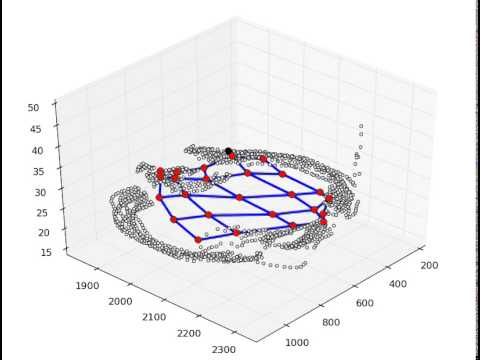

In [9]:
YouTubeVideo('k7DK5fnJH94')

### Characteristics:
- Grid shape needs to be set a priori
- Results depend on the initialization (even tough it can be quite robust to it)
- Fitting a SOM can be computationally expensive
- Capable of finding the global optimum (theoretically - if the LR -> 0)
- Visualization tool for high-dimensional data

### Additional analyses/tutorials
- [Air Flights](https://github.com/sevamoo/SOMPY/blob/master/sompy/examples/AirFlights_hexagonal_grid.ipynb)
- [Visualizations on toy datasets](https://gist.github.com/sevamoo/035c56e7428318dd3065013625f12a11)

### How to apply Self-Organizing Maps?

The training of a SOM is **more effective** if it is done in two phases: the unfolding phase, and the fine-tuning phase. 

In the **unfolding phase** the objective is to **spread the units** in the region of the input space where the data patterns are located. In this phase the neighbourhood function should have a large initial radius so that all units have high mobility and the map can quickly cover the input space.

The **fine tuning phase**, as the name implies, is the process of small adjustments in order to **reduce the quantization error**, and centre the units in the areas where the density of patterns is highest. Usually, in this phase the learning rate and the neighbourhood radius are smaller than the ones used in the unfolding phase. As these two parameters are smaller, the map will need more time to adjust its weights and that is why the number of iterations or epochs is normally higher.

**Exercise**
- Train a SOM with a 10x10 grid, random initialization, gaussian neighborhood function and hexagonal topology/lattice
- Set an unfolding phase and a fine tuning phase of 100 iterations

In [11]:
# This som implementation does not have a random seed parameter
# We're going to set it up ourselves
np.random.seed(42)

sm = sompy.SOMFactory().build(
    data=df[metric_features].values,
    mapsize=[10,10],
    lattice='rect',
    neighborhood='gaussian',
    training='batch',
    component_names=metric_features
)
sm.train(n_job=-1, verbose='info',train_rough_len=50, train_finetune_len=50)  # CODE HERE

 Training...
 pca_linear_initialization took: 0.079000 seconds
 Rough training...
 radius_ini: 2.000000 , radius_final: 1.000000, trainlen: 50

 epoch: 1 ---> elapsed time:  0.086000, quantization error: 1.921648

 epoch: 2 ---> elapsed time:  0.404000, quantization error: 1.866924

 epoch: 3 ---> elapsed time:  0.298000, quantization error: 1.819412

 epoch: 4 ---> elapsed time:  0.360000, quantization error: 1.797404

 epoch: 5 ---> elapsed time:  0.222000, quantization error: 1.785803

 epoch: 6 ---> elapsed time:  0.201000, quantization error: 1.777631

 epoch: 7 ---> elapsed time:  0.317000, quantization error: 1.770286

 epoch: 8 ---> elapsed time:  0.271000, quantization error: 1.764010

 epoch: 9 ---> elapsed time:  0.964000, quantization error: 1.758034

 epoch: 10 ---> elapsed time:  0.976000, quantization error: 1.752064

 epoch: 11 ---> elapsed time:  0.956000, quantization error: 1.746524

 epoch: 12 ---> elapsed time:  0.910000, quantization error: 1.741017

 epoch: 13 --

## Visualizing data with SOMs

### Component planes
What do they represent? What kinds of information do they contain?

Analyse these plots from the following perspectives:
- Feature importance
- Feature correlation (both globally and locally)
- Data distribution
- Outlier detection

<class 'sompy.sompy.SOM'>


ValueError: Number of rows must be a positive integer, not 4.333333333333334

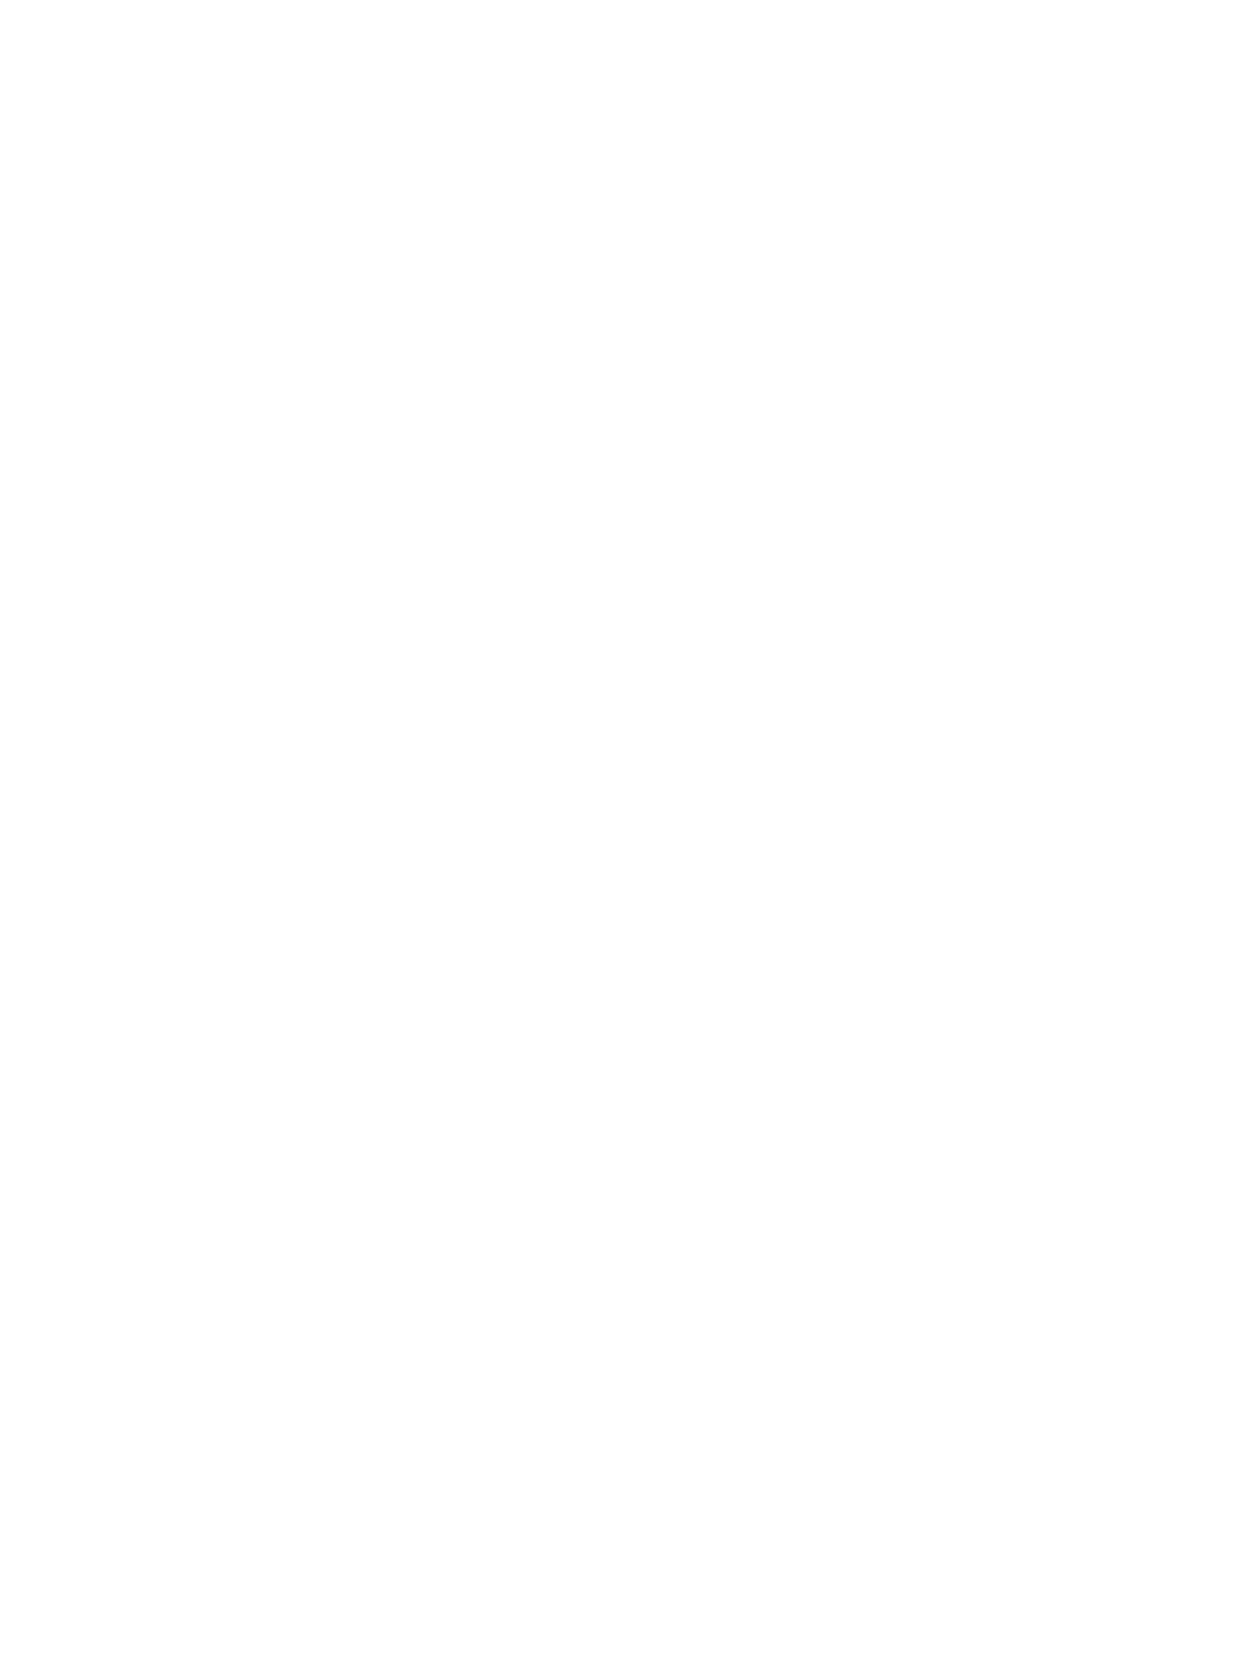

In [15]:
# Visualizing the Component planes (feature values)
sns.set()
view2D = View2D(12,12,"", text_size=10)
print(sm)
print(type(sm))
view2D.show(sm, col_sz=3, what='codebook')
plt.subplots_adjust(top=0.90)
plt.suptitle("Component Planes", fontsize=20)
plt.show()

## U-matrix
Encode each neuron in the output space with the **average distance** to its neighbors in the input space.
 
Analyse these plots from the following perspectives:
- Clusters of units
- Pontential outliers (units which are very distant from its neighbors and have low frequency)

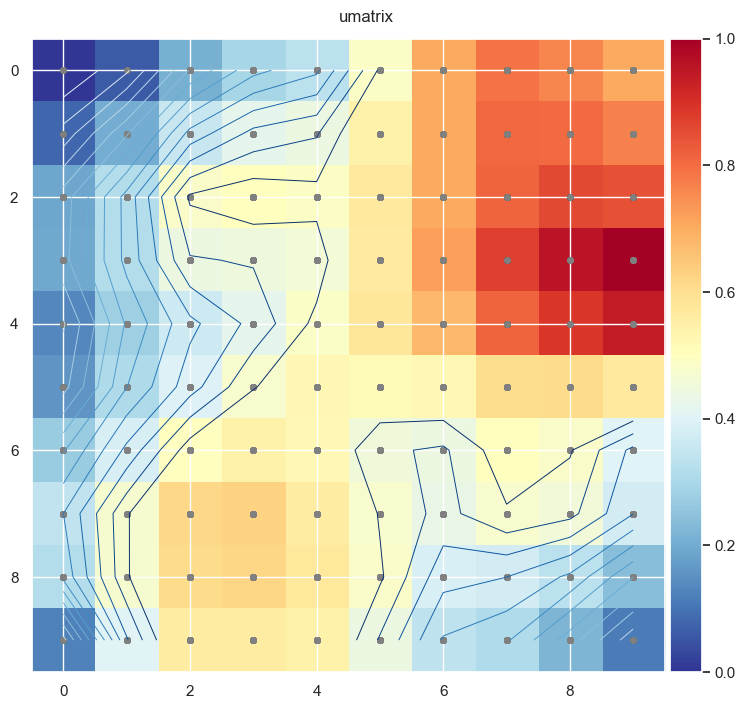

array([[1.06493975, 1.10680091, 1.12919259, 1.06605634, 0.90299924,
        0.79257746, 0.76442895, 0.69923382, 0.59140901, 0.54574589],
       [1.11279605, 1.13885843, 1.14036481, 1.06482931, 0.94420802,
        0.87088611, 0.85603737, 0.80641136, 0.69383441, 0.60495629],
       [1.16989972, 1.17877231, 1.14608084, 1.06481   , 0.96527518,
        0.90724265, 0.91585293, 0.90266723, 0.78128745, 0.68407651],
       [1.28325459, 1.25068935, 1.19034926, 1.07845504, 0.96100301,
        0.88464912, 0.87569986, 0.87094503, 0.77993736, 0.68864495],
       [1.23824679, 1.20113655, 1.14632836, 1.04587385, 0.97039964,
        0.90539802, 0.85585493, 0.8163529 , 0.75105185, 0.64388905],
       [0.96508011, 0.99500415, 0.99210061, 0.93146102, 0.92546569,
        0.93307985, 0.89609186, 0.83690389, 0.77191694, 0.66246671],
       [0.84121904, 0.90085769, 0.9155599 , 0.86907522, 0.87797205,
        0.92996907, 0.9489837 , 0.91270842, 0.82920122, 0.74463576],
       [0.82384453, 0.88114588, 0.8955210

In [19]:
# Here you have U-matrix
u = sompy.umatrix.UMatrixView(9, 9, 'umatrix', show_axis=True, text_size=8, show_text=True)

UMAT = u.show(
    sm, 
    distance=2, 
    row_normalized=False, 
    show_data=True, 
    contour=True, # Visualize isomorphic curves
    blob=False
)

np.flip(UMAT[1], axis=1) # U-matrix values - they match with the plot colors

### Hit-map
Show the **frequency** of each Unit in the output map

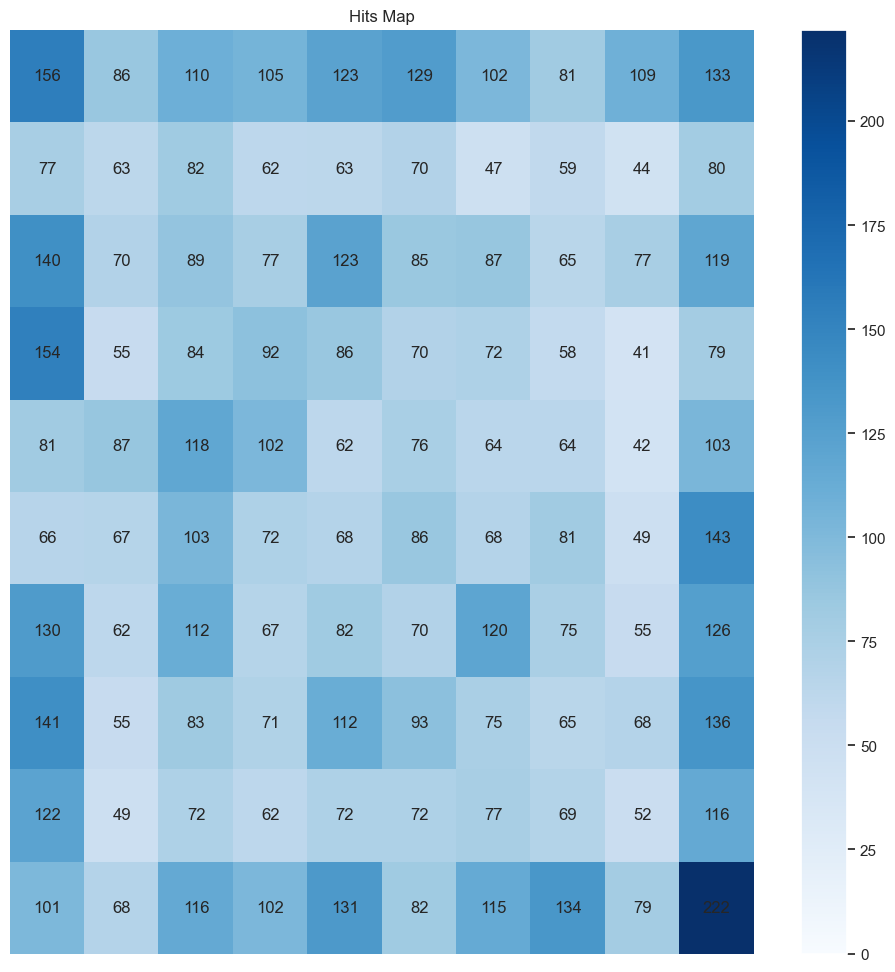

In [20]:
vhts  = BmuHitsView(12,12,"Hits Map")
vhts.show(sm, anotate=True, onlyzeros=False, labelsize=12, cmap="Blues")
plt.show()

## Clustering with SOMs: K-means SOM vs Emergent SOM
- In **k-means SOM**, the *number of units should be equal to the expected number of clusters*, and thus each cluster should be represented by a single unit. 
- In **emergent SOM**, a very *large number of units is used*. These very large SOM allow for very clear U-Matrices and are useful for detecting quite clearly the underlying structure of the data. This technique can be **used together with other clustering algorithms**.

**Exercise**
- Train a SOM with a 50x50 grid, random initialization, gaussian neighborhood function and hexagonal topology/lattice
- Set an unfolding phase and a fine tuning phase of 100 iterations

In [ ]:
# This som implementation does not have a random seed parameter
# We're going to set it up ourselves
np.random.seed(42)

# Notice that the SOM did not converge - We're under a time constraint for this class
sm = sompy.SOMFactory().build(
    # CODE HERE - mapsize NEEDS TO BE A LIST
    training='batch',
    component_names=metric_features
)
sm.train(n_job=4, verbose='info', # CODE HERE

In [ ]:
# Coordinates of the units in the input space
sm.codebook.matrix

In [ ]:
# Component planes on the 50x50 grid
sns.set()
view2D = View2D(12,12,"", text_size=10)
view2D.show(sm, col_sz=3, what='codebook')
plt.subplots_adjust(top=0.90)
plt.suptitle("Component Planes", fontsize=20)
plt.show()

In [ ]:
# U-matrix of the 50x50 grid
u = sompy.umatrix.UMatrixView(9, 9, 'umatrix', show_axis=True, text_size=8, show_text=True)

UMAT = u.show(
    sm, 
    distance=2, 
    row_normalized=False, 
    show_data=False, 
    contour=True # Visualize isomorphic curves
)

Now we can have a better idea of how the input space look like in terms of distances.

### K-Means on top of SOM units
- Define number of clusters to retain

In [ ]:
# Do a simple Inertia plot here (check last class' notebook)

In [ ]:
# Perform K-Means clustering on top of the 2500 untis (sm.get_node_vectors() output)
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=20, random_state=42)
nodeclus_labels = kmeans.fit_predict(sm.codebook.matrix)
sm.cluster_labels = nodeclus_labels  # setting the cluster labels of sompy

hits = HitMapView(12, 12,"Clustering", text_size=10)
hits.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

### Hierarchical Clustering on top of SOM units
- Define best linkage method
- Define number of clusters to retain

In [ ]:
# Do the R² plot here and the Dendrogram (check last class' notebook)

In [ ]:
# Perform Hierarchical clustering on top of the 2500 untis (sm.get_node_vectors() output)
hierclust = AgglomerativeClustering(n_clusters=4, linkage='ward')
nodeclus_labels = hierclust.fit_predict(sm.codebook.matrix)
sm.cluster_labels = nodeclus_labels  # setting the cluster labels of sompy

hits  = HitMapView(12, 12,"Clustering",text_size=10)
hits.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

### Final SOM Clustering solution

In [ ]:
# Check the nodes and and respective clusters
nodes = sm.codebook.matrix

df_nodes = pd.DataFrame(nodes, columns=metric_features)
df_nodes['label'] = nodeclus_labels
df_nodes

In [ ]:
# Obtaining SOM's BMUs labels
bmus_map = sm.find_bmu(df[metric_features])[0]  # get bmus for each observation in df

df_bmus = pd.DataFrame(
    np.concatenate((df, np.expand_dims(bmus_map,1)), axis=1),
    index=df.index, columns=np.append(df.columns,"BMU")
)
df_bmus

In [ ]:
# Get cluster labels for each observation
df_final = df_bmus.merge(df_nodes['label'], 'left', left_on="BMU", right_index=True)
df_final

In [ ]:
# Characterizing the final clusters
df_final.drop(columns='BMU').groupby('label').mean()

## Analysing the appropriateness of our solution
### R²

In [ ]:
# using R²
def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

sst = get_ss(df_final[metric_features])  # get total sum of squares
ssw_labels = df_final[metric_features.to_list() + ["label"]].groupby(by='label').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
r2

### Quantization error:
The quantization error is given by the average distance between a unit and the data points mapped to it i.e. all the input data points that share it as BMU.

$$q_e = \frac{\sum_{i=0}^{N_e}||x_i - w_e||}{N_e}$$

$$Q = \frac{\sum_{e=0}^Eq_e}{E}$$
, where:

$Q$ is the overall quantization error of SOM,

$q_e$ is the quantization error for unit $e$,

$x_i$ is a data point/ observation,

$w_e$ is the unit $e$ representation in the input space,

$N_e$ is number of data points mapped to unit $e$,

$E$ is the number of units in the SOM grid